## Preprocessing data

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}


### Preprocessing and fetching the train data

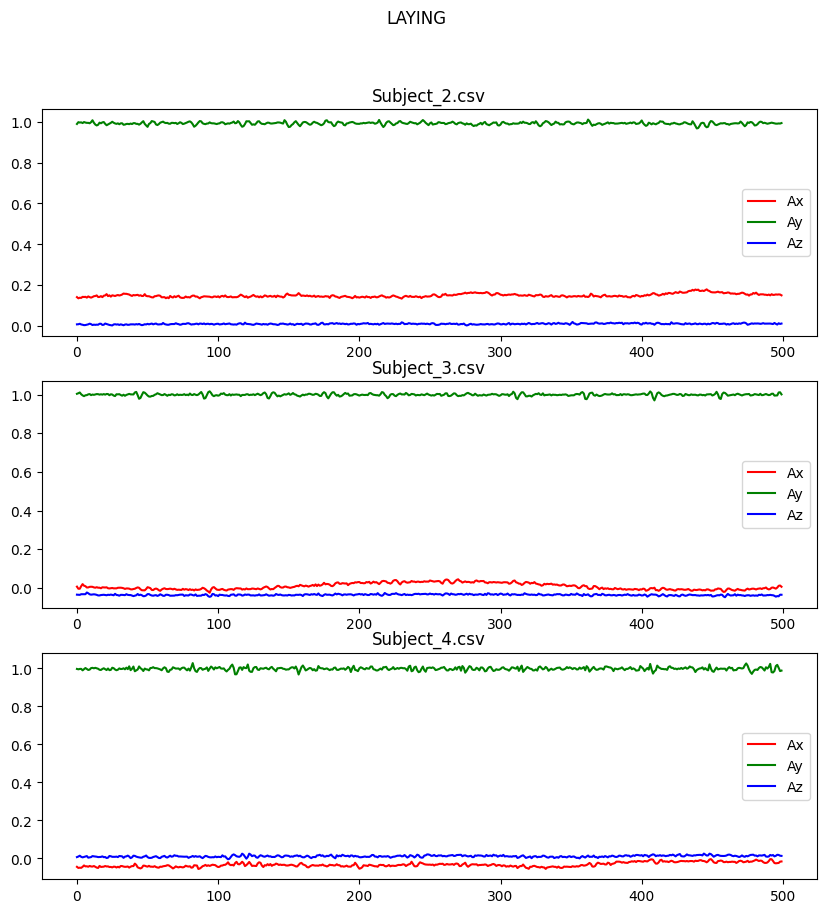

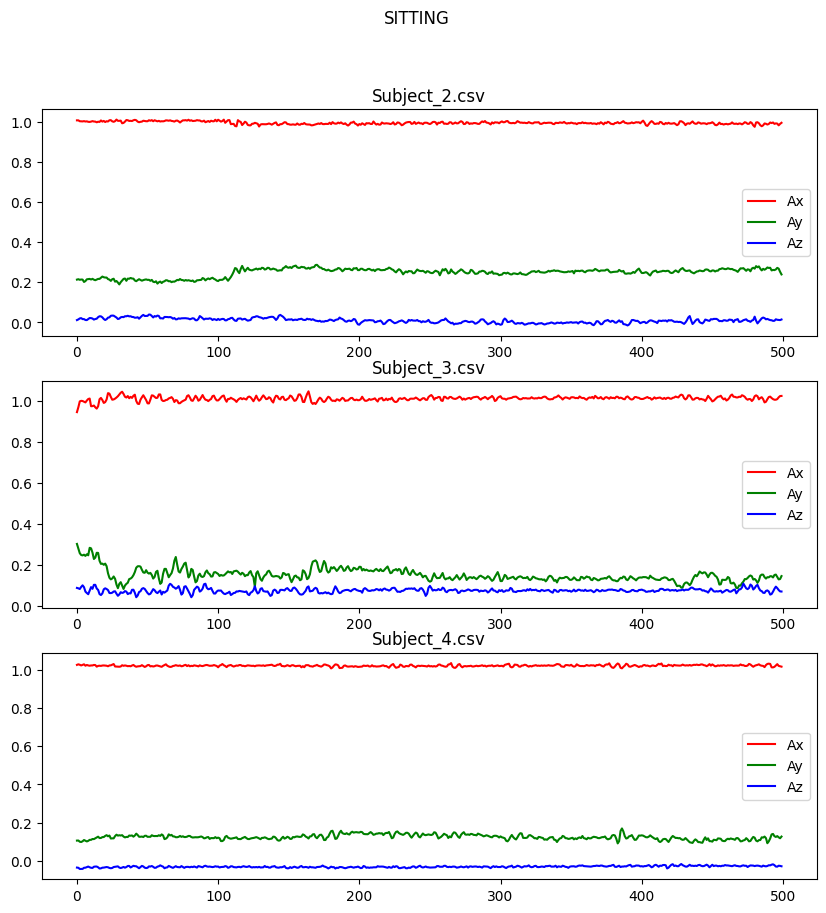

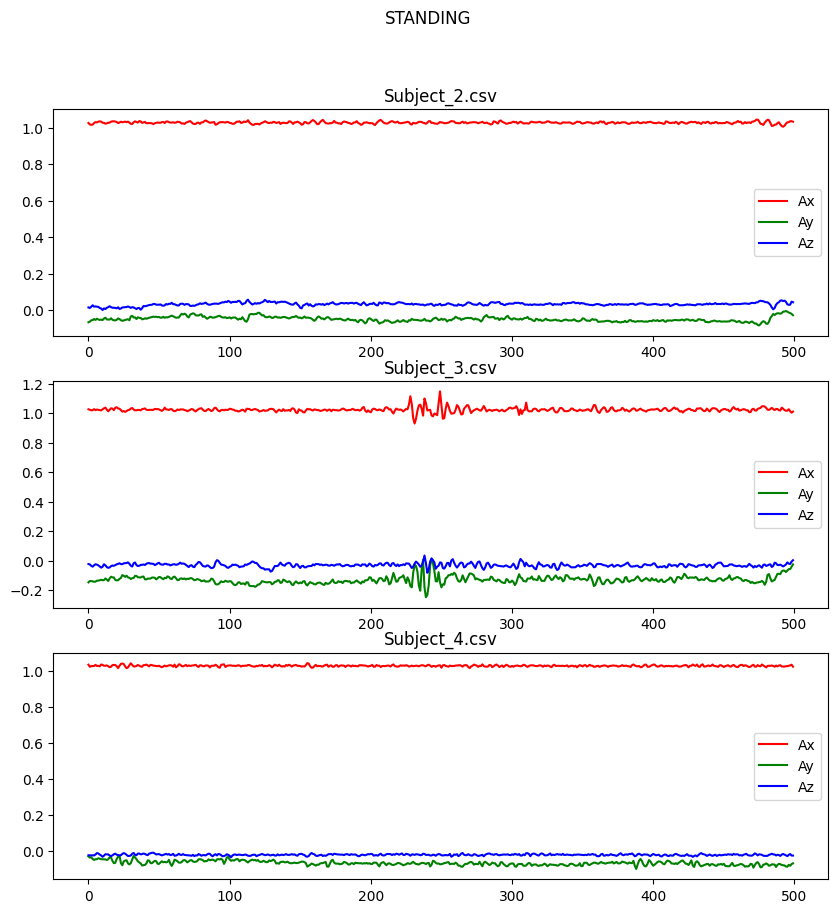

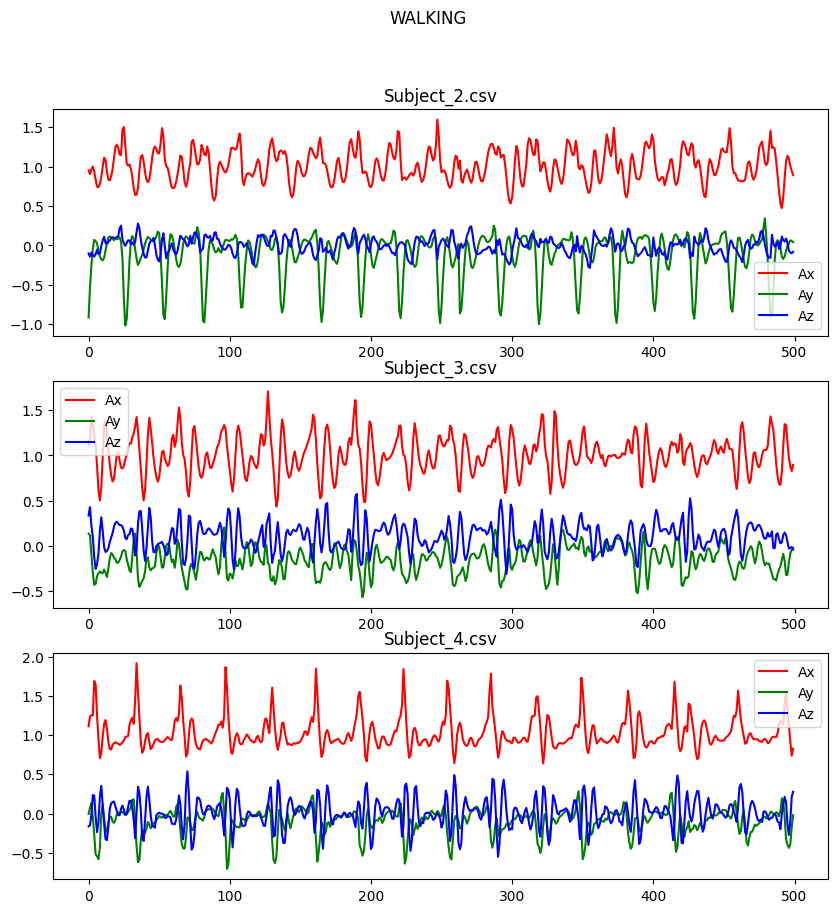

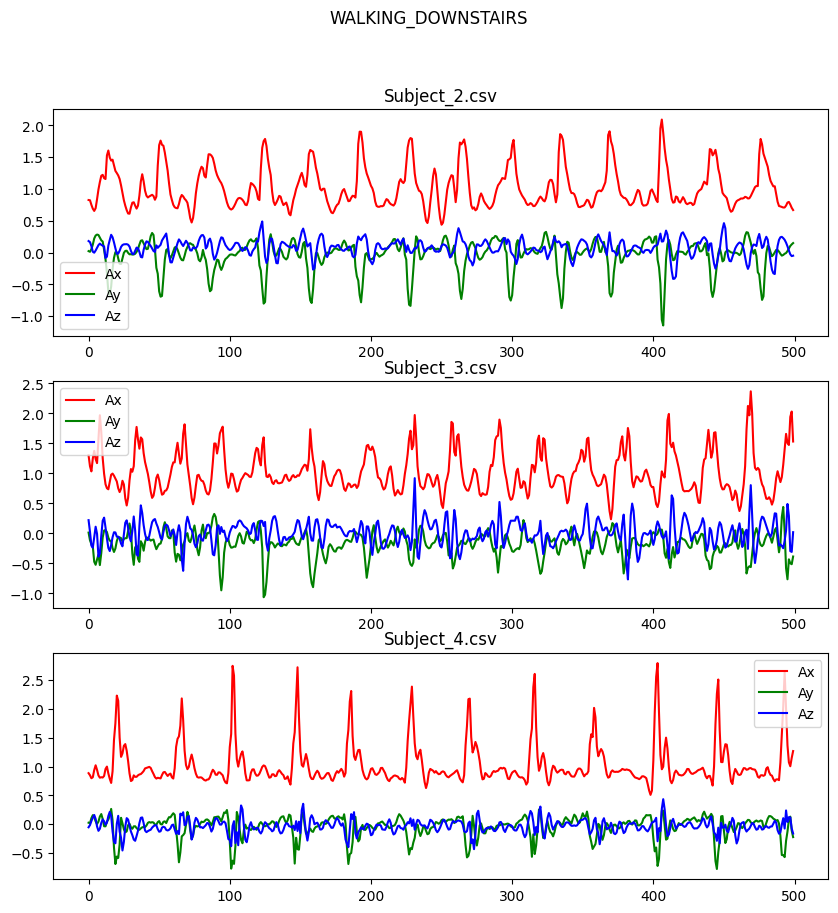

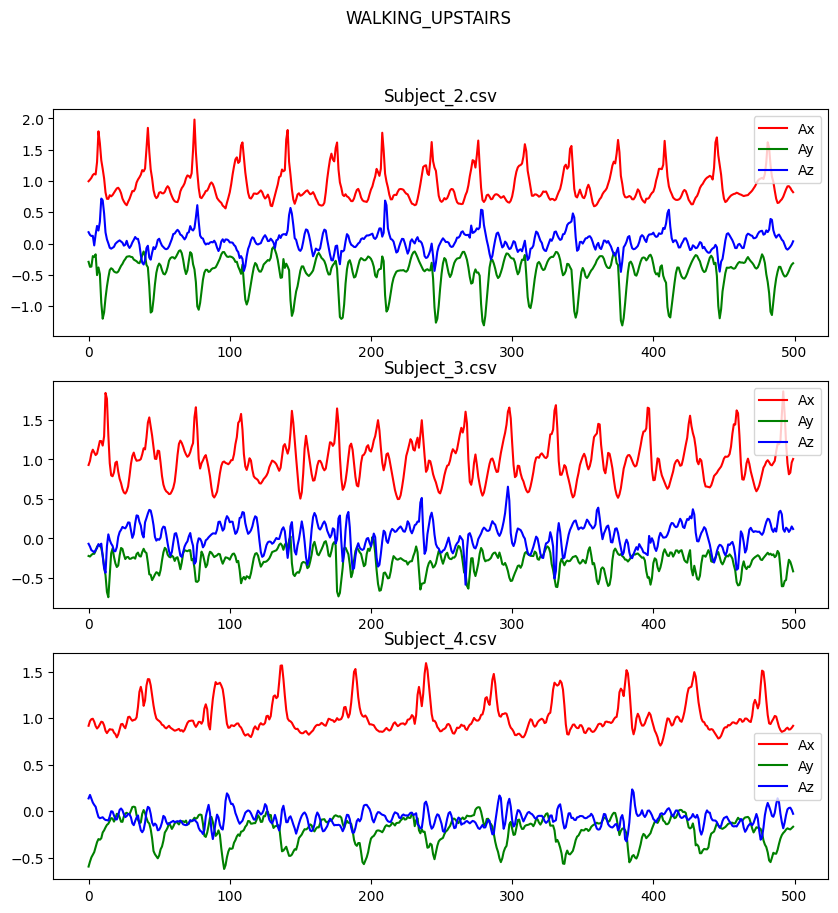

(18, 500, 3)
(18,)


In [2]:
X_train=[]
y_train=[]
# dataset_dir = os.path.join(combined_dir,"Train")
# count =0
for folder in folders:
    dataset_dir = os.path.join("Our_Combined", "Train", folder)
    plt.figure(figsize=(10,10))
    plt.suptitle(folder)
    i=1
    for file in os.listdir(dataset_dir):
        data = pd.read_csv(os.path.join(dataset_dir, file))
        data_reduced = data.drop(columns=['time', 'TgF'])
        # # switch order of columns
        data_reduced = data_reduced[['gFy', 'gFz', 'gFx']]
        data_reduced.columns = ['gFx', 'gFy', 'gFz']
        # downsample to 50 Hz from 400 Hz
        data = data_reduced.iloc[::8]
        # get 300 to 800
        data = data.iloc[300:800].reset_index(drop=True)

        X_train.append(data.values)
        y_train.append(classes[folder])

        # print(data.shape)
        plt.subplot(3,1,i)
        plt.plot(data['gFx'], label='Ax',color='red')
        plt.plot(data['gFy'], label='Ay',color='green')
        plt.plot(data['gFz'], label='Az',color='blue')
        plt.legend()
        plt.title(file)
        i+=1
    plt.show()

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

### Preprocessing and fetching the test data

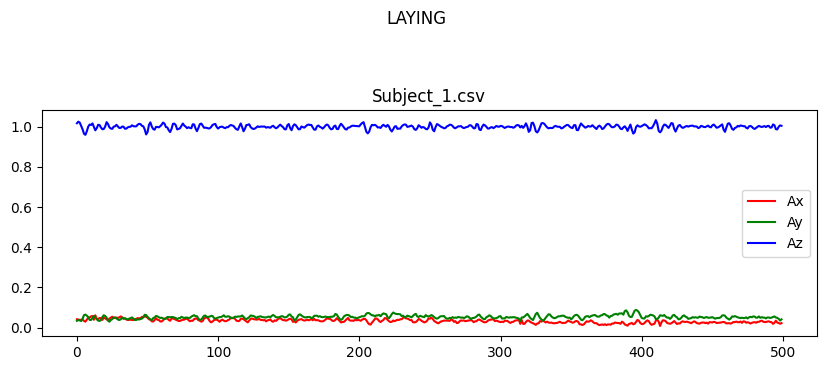

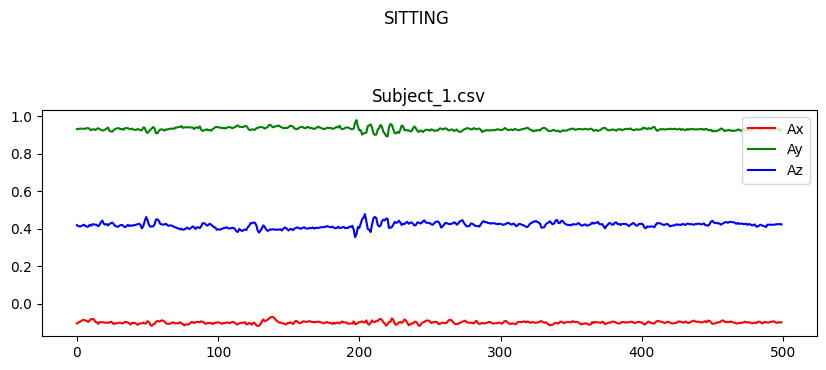

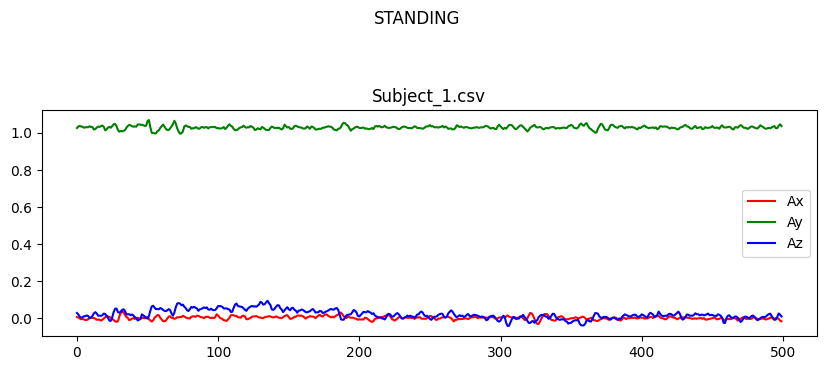

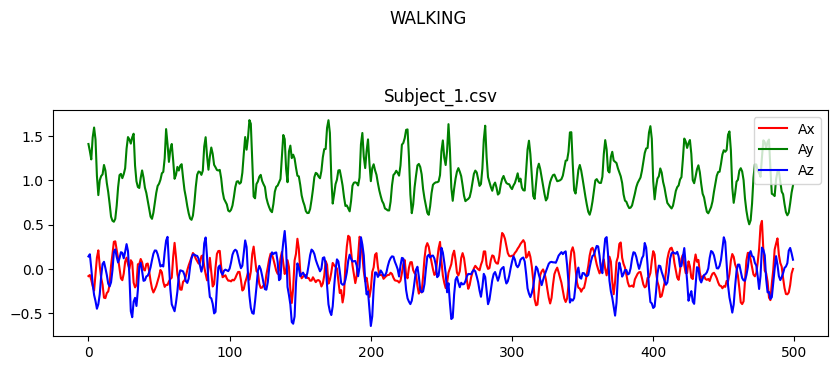

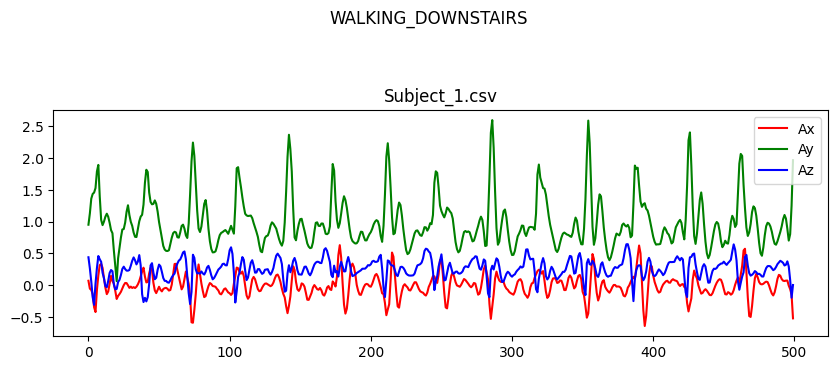

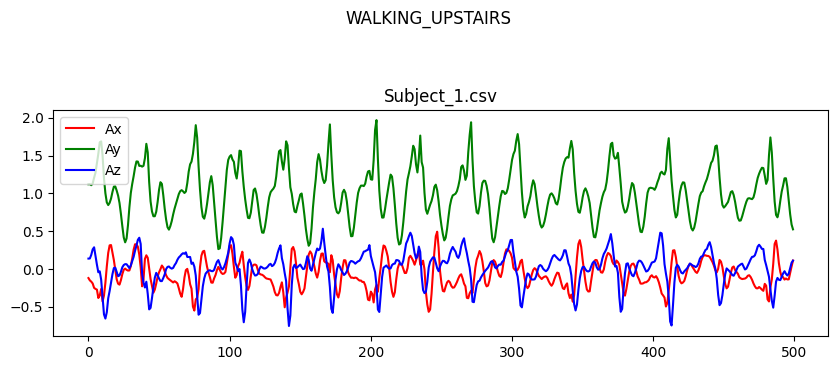

(6, 500, 3)
(6,)


In [5]:
X_test=[]
y_test=[]

for folder in folders:
    dataset_dir = os.path.join("Our_Combined","Test", folder)
    plt.figure(figsize=(10,10))
    plt.suptitle(folder)
    i=1
    
    for file in os.listdir(dataset_dir):
        data = pd.read_csv(os.path.join(dataset_dir, file))
        data_reduced = data.drop(columns=['time', 'TgF'])
        # # switch order of columns
        data_reduced = data_reduced[['gFy', 'gFz', 'gFx']]
        # downsample to 50 Hz from 400 Hz
        data = data_reduced.iloc[::8]
        # get 300 to 800
        data = data.iloc[300:800].reset_index(drop=True)
        # print(data.shape)
        X_test.append(data.values)
        y_test.append(classes[folder])

        plt.subplot(3,1,i)
        plt.plot(data['gFx'], label='Ax',color='red')
        plt.plot(data['gFy'], label='Ay',color='green')
        plt.plot(data['gFz'], label='Az',color='blue')
        plt.legend()
        plt.title(file)
        i+=1
    plt.show()

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

### Data Cleaning

In [ ]:
# check for duplicated data, numpy doesnt have duplicated() function
def duplicates(data):
    return len(data) - len(np.unique(data, axis=0))

print("Number of duplicated samples in training data: ", duplicates(X_train))
print("Number of duplicated samples in testing data: ", duplicates(X_test))


Number of duplicated samples in training data:  0
Number of duplicated samples in testing data:  0


In [ ]:
def null_values(data):
    return np.isnan(data).sum()

print("Number of NaN/Null values in training data: ", null_values(X_train))
print("Number of NaN/Null values in testing data: ", null_values(X_test))

Number of NaN/Null values in training data:  0
Number of NaN/Null values in testing data:  0


In [4]:
# Save the data
if not os.path.exists("./Our_Saved"):
    os.makedirs("./Our_Saved")

np.save("./Our_Saved/X_train.npy",X_train)
np.save("./Our_Saved/X_test.npy",X_test)
np.save("./Our_Saved/y_train.npy",y_train)
np.save("./Our_Saved/y_test.npy",y_test)

print("Data saved successfully!")

Data saved successfully!
